# 1. Librerías necesarias

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.stats import f

# ¿Para qué sirve cada librería?

| Librería                   | Propósito                                                                 |
|----------------------------|---------------------------------------------------------------------------|
| `pandas`                   | Manejo de datos en forma tabular (DataFrames), similar a `data.frame` en R |
| `numpy`                    | Cálculos numéricos y manejo eficiente de vectores y matrices              |
| `matplotlib.pyplot`        | Gráficos básicos (scatter plots, líneas, figuras)                         |
| `seaborn`                  | Visualizaciones estadísticas atractivas y fáciles de usar                |
| `statsmodels.api`          | Modelado estadístico clásico: regresiones, ANOVA, tests                   |
| `statsmodels.formula.api`  | Modelos con fórmulas tipo R, como `y ~ x`                                 |
| `scipy.stats`              | Herramientas estadísticas: distribuciones, QQ-plot, pruebas de hipótesis |


# 2. Lectura de datos

In [5]:
df = pd.read_csv("L:/Mi unidad/CienciaDeDatos/EspecializacionUNO/RegresionLinealSimple/Datos/Grasas.csv", sep=';')


# 3. Definición del modelo

In [6]:
# Modelo: grasas ~ peso
modelo = smf.ols('grasas ~ edad', data=df).fit()

# 4. Scatter plot de los datos

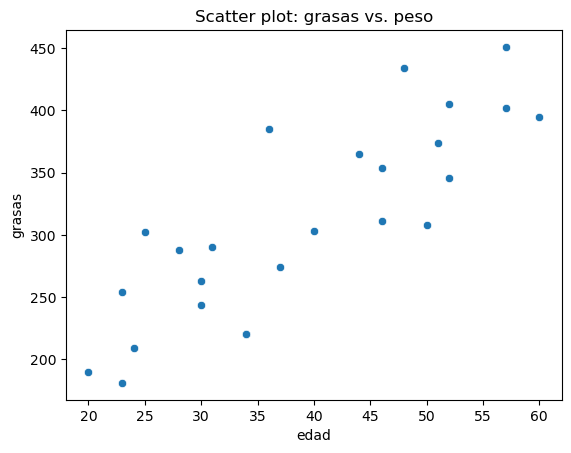

In [7]:
sns.scatterplot(data=df, x='edad', y='grasas')
plt.title('Scatter plot: grasas vs. peso')
plt.show()

# 5. Scatter plot con línea de regresión

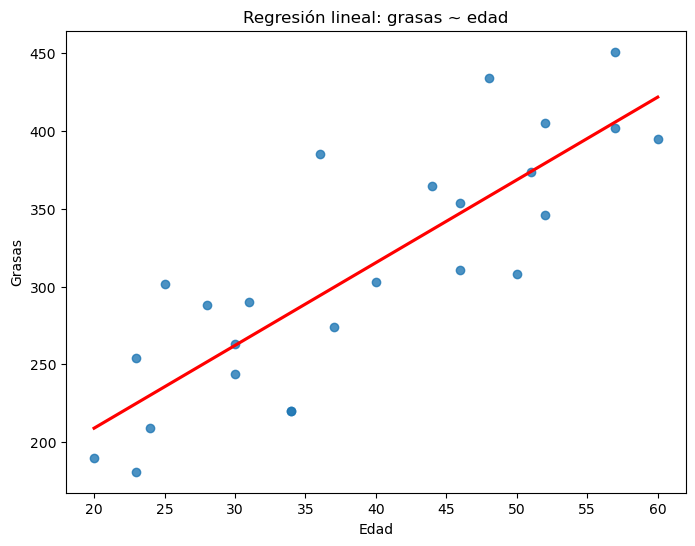

In [8]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='edad', y='grasas', ci=None, line_kws={"color": "red"})
plt.title('Regresión lineal: grasas ~ edad')
plt.xlabel('Edad')
plt.ylabel('Grasas')
plt.show()


# 6. Summary del modelo

In [9]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 grasas   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     53.96
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           1.79e-07
Time:                        19:07:31   Log-Likelihood:                -128.73
No. Observations:                  25   AIC:                             261.5
Df Residuals:                      23   BIC:                             263.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.5751     29.638      3.461      0.0

# 7. Validación de supuestos

In [10]:
residuos = modelo.resid
residuos_std = residuos / np.std(residuos)
predichos = modelo.fittedvalues


# 8. Gráfico de residuos estandarizados vs predichos

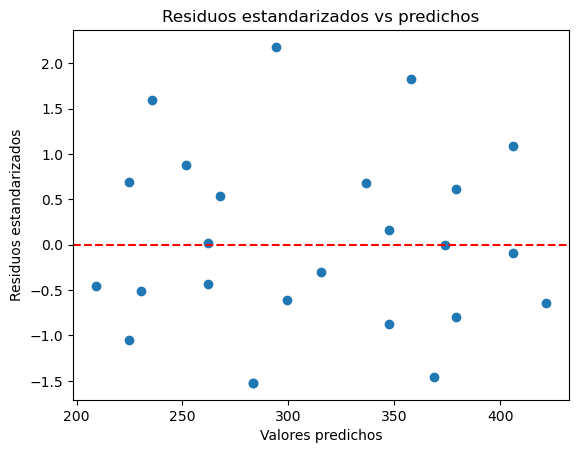

In [11]:
plt.scatter(predichos, residuos_std)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos estandarizados vs predichos")
plt.xlabel("Valores predichos")
plt.ylabel("Residuos estandarizados")
plt.show()

# 9. QQ plot de residuos estandarizados

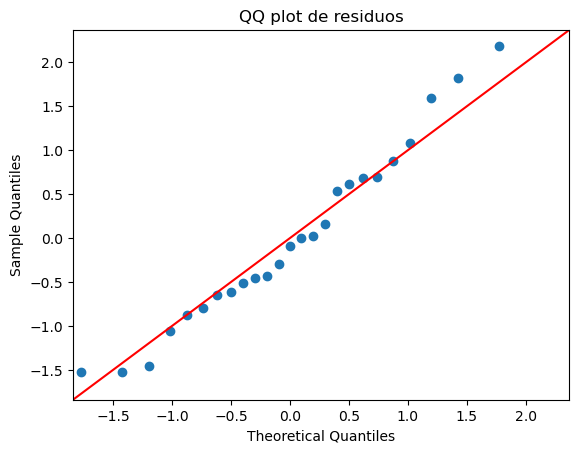

In [12]:
sm.qqplot(residuos, line='45', fit=True)
plt.title("QQ plot de residuos")
plt.show()

# 10. Intervalos de confianza y predicción

In [24]:
nuevo_edad = pd.DataFrame({'edad': np.linspace(df['edad'].min(), df['edad'].max(), 100)})
predicciones = modelo.get_prediction(nuevo_edad)
intervalos = predicciones.summary_frame(alpha=0.05)
predicciones
intervalos

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,208.988669,16.350375,175.165341,242.811996,112.930299,305.047038
1,211.138437,16.103264,177.826298,244.450576,115.258869,307.018005
2,213.288205,15.857703,180.484048,246.092362,117.583944,308.992466
3,215.437973,15.613764,183.138441,247.737506,119.905504,310.970442
4,217.587742,15.371526,185.789316,249.386167,122.223531,312.951952
...,...,...,...,...,...,...
95,413.216649,16.438707,379.210592,447.222706,317.093786,509.339512
96,415.366417,16.687810,380.845052,449.887782,319.060044,511.672790
97,417.516185,16.938305,382.476631,452.555740,321.022853,514.009518
98,419.665953,17.190133,384.105455,455.226452,322.982232,516.349675


# 11. Plot con IC y IP

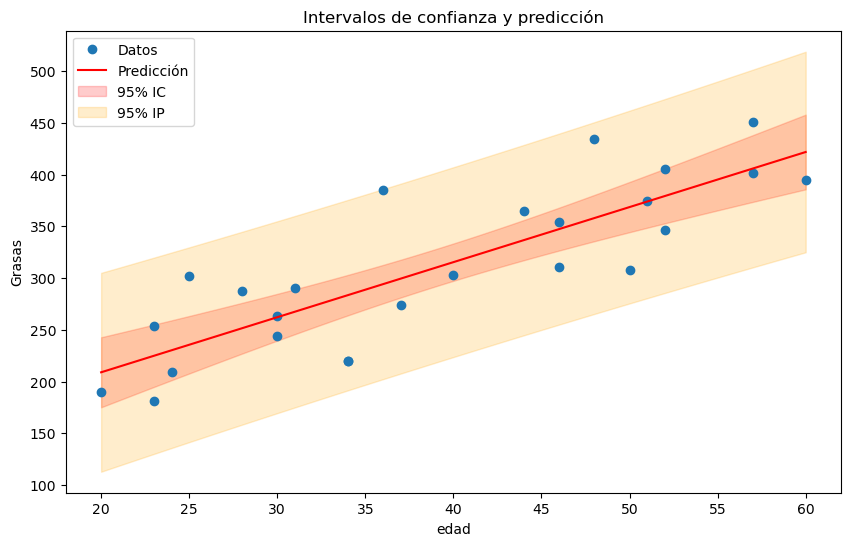

In [26]:
plt.figure(figsize=(10,6))
plt.plot(df['edad'], df['grasas'], 'o', label='Datos')
plt.plot(nuevo_edad, intervalos['mean'], 'r', label='Predicción')
plt.fill_between(nuevo_edad['edad'], intervalos['mean_ci_lower'], intervalos['mean_ci_upper'], 
                 color='red', alpha=0.2, label='95% IC')
plt.fill_between(nuevo_edad['edad'], intervalos['obs_ci_lower'], intervalos['obs_ci_upper'], 
                 color='orange', alpha=0.2, label='95% IP')
plt.xlabel("edad")
plt.ylabel("Grasas")
plt.legend()
plt.title("Intervalos de confianza y predicción")
plt.show()



# 12. Puntos influyentes

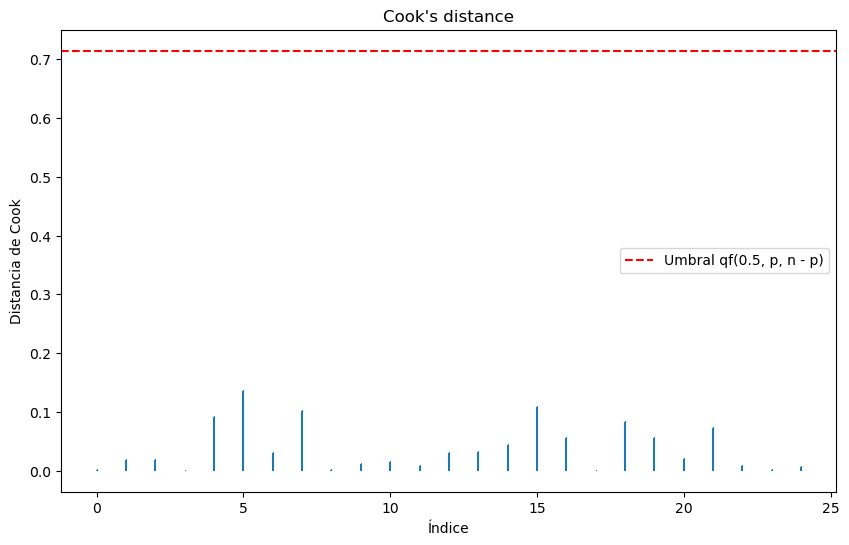


Puntos con leverage alto (> 2k/n):
    peso  edad  grasas  leverage     cooks
14    59    60     395  0.161082  0.043567

Puntos con alta influencia (Cook's D > 4/n):
Empty DataFrame
Columns: [peso, edad, grasas, leverage, cooks]
Index: []


In [27]:
influencia = modelo.get_influence()
leverage = influencia.hat_matrix_diag
cooks = influencia.cooks_distance[0]
n = len(df)       # número de observaciones
p = modelo.df_model + 1

umbral_cooks = f.ppf(0.5, dfn=p, dfd=n - p)


# Leverage y Cook's distance
plt.figure(figsize=(10,6))
plt.stem(np.arange(len(df)), cooks, markerfmt=",", basefmt=" ")
plt.axhline(umbral_cooks, color='red', linestyle='--', label='Umbral qf(0.5, p, n - p)')
plt.title("Cook's distance")
plt.xlabel("Índice")
plt.ylabel("Distancia de Cook")
plt.legend()
plt.show()

# Puntos con alto leverage o influencia
df_diagnostico = df.copy()
df_diagnostico['leverage'] = leverage
df_diagnostico['cooks'] = cooks

print("\nPuntos con leverage alto (> 2k/n):")
print(df_diagnostico[df_diagnostico['leverage'] > (2 * 2 / len(df))])

print("\nPuntos con alta influencia (Cook's D > 4/n):")
print(df_diagnostico[df_diagnostico['cooks'] > (4 / len(df))])